<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
Galaxy multiWaveLength <br><br><br>Analysis using numpy</p>

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>Data Source: https://asd.gsfc.nasa.gov</p>



Loading the libraries we need

In [3]:
%matplotlib inline
import numpy as np
import imageio
from skimage import color
import matplotlib.pyplot as plt
import copy
import os

In [4]:
os.listdir('multiwavelength/')

['Radio.jpg', 'Infrared.jpg', 'GammaRay.jpg', 'XRay.jpg']

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">Creating a numpy array from an image file:</p>
<p> load and display each picture from difference wavelength (GammaRay, Xray, Infrared, radio) find the shape of the array, explain each dimension</p>
<p>Sample of output:</p>
<p>(320, 5760, 3)</p>
<img src="./pict/xRayGRB.png" align="left" />

In [22]:
radio = imageio.imread('multiwavelength/Radio.jpg')
xray = imageio.imread('multiwavelength/XRay.jpg')
gamma = imageio.imread('multiwavelength/GammaRay.jpg')
infrared = imageio.imread('multiwavelength/Infrared.jpg')

In [23]:
print(radio.shape)
print(xray.shape)
print(gamma.shape)
print(infrared.shape)

(320, 5760, 3)
(320, 5760, 3)
(320, 5760, 3)
(320, 5760, 3)


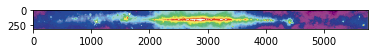

In [24]:
plt.imshow(radio)

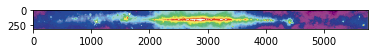

In [18]:
plt.imshow(radio)

In [20]:
radio.shape

(320, 5760, 3)

We have 3 dimensions: N pixels x M pixels x 3 channels (RGB)

<p>As we have 3 dimensions (RGB)and RGB does not add information, merge all 3 dimensions in a single one using grey scale image using the function rgb2gray </p>
<p>Sample of output:</p>
<p>(320, 5760)</p>
<img src="./pict/XRayGray.png" align="left" />

In [25]:
radio_gray = color.rgb2gray(radio)
xray_gray = color.rgb2gray(xray)
gamma_gray = color.rgb2gray(gamma)
infrared_gray = color.rgb2gray(infrared)

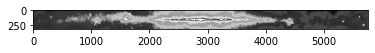

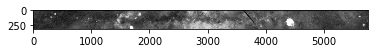

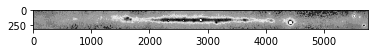

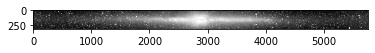

In [30]:
plt.imshow(radio_gray, cmap='gray')
plt.show()
plt.imshow(xray_gray, cmap='gray')
plt.show()
plt.imshow(gamma_gray, cmap='gray')
plt.show()
plt.imshow(infrared_gray, cmap='gray')
plt.show()

<p>Merge all 3 waveLength in a single rgb image. Define to which color are linked XRay, Radio and Gamma waveLength</p>
<p>Sample of output:</p>
<img src="./pict/AllBandGRB.png" align="left" />

In [31]:
radio_gray.shape

(320, 5760)

### solution 1

In [113]:
full_wavelength = np.empty((320, 5760, 3))

In [114]:
full_wavelength[:,:,0] = radio_gray 

In [115]:
full_wavelength[:,:,1] = xray_gray 
full_wavelength[:,:,2] = gamma_gray 

In [58]:
full_wavelength.shape

(320, 5760, 3)

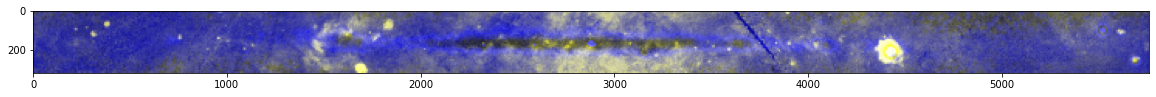

In [59]:
plt.figure(figsize=(20,10))
plt.imshow(full_wavelength)

### solution 2

In [51]:
radio_gray[:,:,np.newaxis].shape

(320, 5760, 1)

In [54]:
sol2 = np.concatenate([radio_gray[:,:,np.newaxis], 
                xray_gray[:,:,np.newaxis], 
                gamma_gray[:,:,np.newaxis]
               ], axis=2)
sol2.shape

(320, 5760, 3)

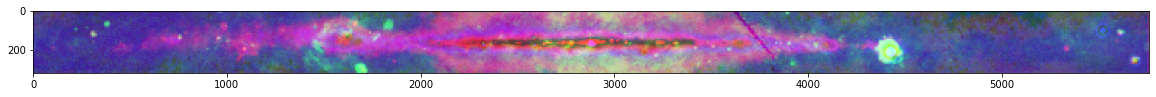

In [56]:
plt.figure(figsize=(20,10))
plt.imshow(sol2)

apply some cleaning to remove noise with value < 0.15
<p>Sample of output:</p>

<img src="./pict/AllBandClean1.png" align="left" />

we have an array ```a = np.array([1, 3, 4,5,6,190])```
select values > 5 

In [69]:
a = np.array([1, 3, 4,5,6,190])

In [72]:
mask = a > 5
mask

array([False, False, False, False,  True,  True])

In [73]:
a[mask]

array([  6, 190])

In [93]:
mask = full_wavelength < 0.15

In [94]:
full_wavelength[mask].shape

(32821,)

In [95]:
full_wavelength[mask] = 0 

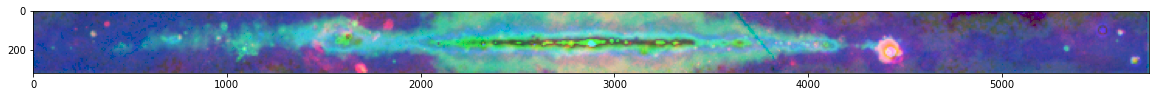

In [96]:
plt.figure(figsize=(20,10))
plt.imshow(full_wavelength)

apply some cleaning to highlight part of the picture where XRay>0.22, Radio>0.15,  GammaRay>0.15
<p>Sample of output:</p>

<img src="./pict/AllBandClean2.png" align="left" />

In [118]:
mask_radio = full_wavelength[:,:,0] < 0.9
mask_xray = full_wavelength[:,:,1] < 0.9
mask_gamma = full_wavelength[:,:,2] < 0.9

full_wavelength[:,:,0][mask_radio] = 0
full_wavelength[:,:,1][mask_xray] = 0
full_wavelength[:,:,2][mask_gamma] = 0

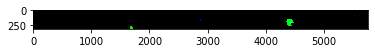

In [119]:
plt.imshow(full_wavelength)

Only a single part of the picture should be highlighted. Try to find the center of his position using the following mask:

<img src="./pict/mask.png" align="left" style="width:550px;height:360px;"/>